# K-vecinos más próximos #
El último algoritmo de aprendizaje supervisado que queremos analizar en este capítulo es el clasificador **k-vecino más cercanos** (**KNN**), que es particularmente interesante porque es fundamentalmente diferente de los algoritmos de aprendizaje que hemos visto hasta ahora.

KNN es un ejemplo típico de un **aprendizaje perezoso**. Se llama "perezoso" no por su aparente simplicidad, sino porque no aprende una función discriminatoria de los datos de entrenamiento, sino que memoriza el conjunto de datos de entrenamiento.

> ##### Modelos paramétricos versus no paramétricos #####
> Los algoritmos de aprendizaje automático se pueden agrupar en modelos **paramétricos** y **no paramétricos**. Utilizar modelos paramétricos supone estimar parámetros del conjunto de datos de entrenamiento para aprender una función que puede clasificar nuevos puntos de datos sin requerir más el conjunto de datos de entrenamiento original. Ejemplos típicos de modelos paramétricos son el perceptrón, la regresión logística y el SVM lineal. Por el contrario, los modelos no paramétricos no pueden caracterizarse por un conjunto fijo de parámetros, y el número de parámetros crece con los datos de entrenamiento. Dos ejemplos de modelos no paramétricos que hemos visto hasta ahora son el clasificador del árbol de decisión / bosque aleatorio y el kernel SVM.
>
> KNN pertenece a una subcategoría de modelos no paramétricos que se describe como **aprendizaje basado en instancias**. Los modelos basados en el aprendizaje basado en instancias se caracterizan por memorizar el conjunto de datos de entrenamiento, y el aprendizaje perezoso es un caso especial de aprendizaje basado en instancias que se asocia con ningún (cero) costo durante el proceso de aprendizaje.

El algoritmo KNN en sí es bastante sencillo y se puede resumir en los siguientes pasos:
1. Seleccionar el número $k$ y una distancia métrica.
2. Encontrar los $k$ vecinos más cercanos del registro de datos que queremos clasificar.
3. Asignar la etiqueta de clase por voto mayoritario.

La siguiente figura ilustra cómo se asigna un nuevo punto de datos (?) a la etiqueta de clase triángulo basandose en la votación mayoritaria entre sus cinco vecinos más cercanos.

![k vecinos más cercanos](imgs/k-vecinos.png)

Basandose en la métrica de distancia elegida, el algoritmo KNN encuentra los k ejemplos en el conjunto de datos de entrenamiento que son más cercanos (más similares) al punto que queremos clasificar. La etiqueta de clase del punto de datos se determina luego por un voto mayoritario entre sus k vecinos más cercanos.

La ventaja principal de este enfoque basado en memoria es que el clasificador se adapta inmediatamente a medida que recopilamos nuevos datos de entrenamiento. Sin embargo, la desventaja es que la complejidad computacional para clasificar nuevos ejemplos crece linealmente con el número de ejemplos en el conjunto de datos de entrenamiento en el peor de los casos, a menos que el conjunto de datos tenga muy pocas dimensiones (características) y el algoritmo se haya implementado utilizando estructuras de datos eficientes como los árboles k-d. Además, no podemos descartar ejemplos de entrenamiento ya que no se existe ningún paso de entrenamiento. Por lo tanto, el espacio de almacenamiento puede convertirse en un desafío si estamos trabajando con grandes conjuntos de datos.

### Implementación de un model KNN ###

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from decisionregion import plot_decision_regions
from sklearn.preprocessing import StandardScaler

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [4]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [5]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [6]:
from sklearn.neighbors import KNeighborsClassifier

<IPython.core.display.Javascript object>


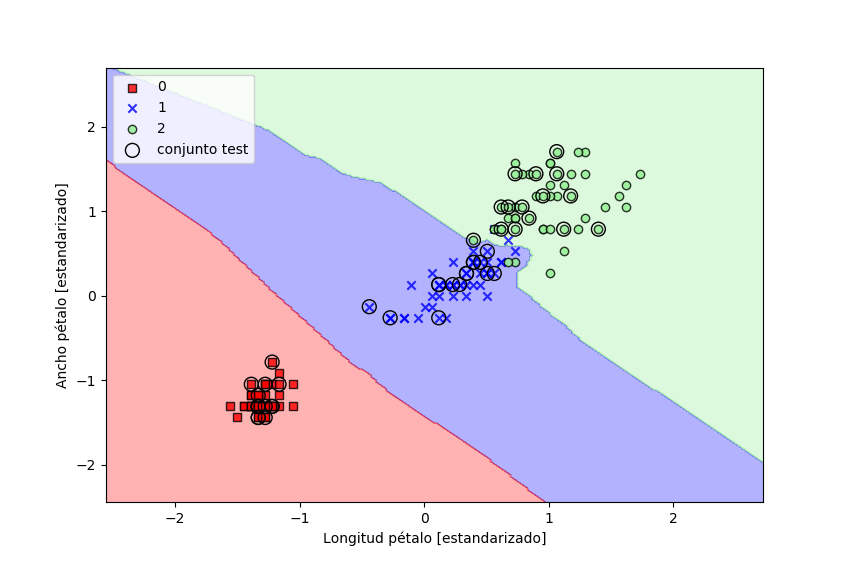

In [7]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                           metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
                      classifier=knn, test_idx=range(105,150))
plt.xlabel('Longitud pétalo [estandarizado]')
plt.ylabel('Ancho pétalo [estandarizado]')
plt.legend(loc='upper left')
plt.show()

Especificando cinco vecinos en el modelo KNN para este conjunto de datos, obtenemos un límite de decisión relativamente suave, como se muestra en la gráfica.

> ##### Resolver empates #####
> En el caso de un empate, la implementación scikit-learn del algoritmo KNN preferirá que se clasifique según los vecinos con una distancia más cercana al registro de datos. Si los vecinos tienen distancias similares, el algoritmo elegirá la etiqueta de clase que viene primero en el conjunto de datos de entrenamiento.

La elección correcta de $k$ es crucial para encontrar un buen equilibrio entre sobreajuste y subajuste. También hay que asegurarse de elegir una métrica de distancia que sea apropiada para las características del conjunto de datos. A menudo, se usa una medida de distancia euclidiana simple para ejemplos de valor real. Sin embargo, si estamos utilizando una medida de distancia euclidiana, también es importante estandarizar los datos para que cada característica contribuya igualmente a la distancia. La distancia `minkowski` que se ha utilizado en el ejmplo anterior es solo una generalización de la distancia euclidiana y de Manhattan, que se puede escribir de la siguiente manera:

$$\begin{equation} d\big(\mathbf{x}^{(i)},\mathbf{x}^{(j)}\big) = \sqrt[p]{\sum_{k}\big|x_{k}^{(i)}x_k^{(j)} \big|}\end{equation}$$

Se convierte en la distancia euclidiana si establecemos el parámetro $p = 2$ o la distancia de Manhattan en $p = 1$. Muchas otras métricas de distancia están disponibles en scikit-learn y se pueden proporcionar al parámetro `metric`.

> ##### La maldición de la dimensionalidad #####
> Es importante mencionar que KNN es muy susceptible al sobreajuste debido a la maldición de la dimensionalidad. La maldición de la dimensionalidad describe el fenómeno en el que el espacio de características se vuelve cada vez más escaso para un número creciente de dimensiones de un conjunto de datos de entrenamiento de tamaño fijo. Podemos pensar que incluso los vecinos más cercanos están demasiado lejos en un espacio de alta dimensión para dar una buena estimación.
>
> Se ha visto el concepto de regularización en la sección sobre regresión logística como una forma de evitar el sobreajuste. Sin embargo, en modelos donde la regularización no es aplicable, como los árboles de decisión y KNN, se puede usar la selección de características y las técnicas de reducción de dimensionalidad para ayudarnos a evitar la maldición de la dimensionalidad.